In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gzip, glob, os, csv
import seaborn as sns

from cdt.metrics import precision_recall, SID, SHD

mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica') 
mpl.rc('text', usetex='false') 
mpl.rcParams.update({'font.size': 20})

# import scienceplots
colormap = ["#56B4E9", "#E69F00", "#000000", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
from matplotlib.ticker import FormatStrFormatter

In [8]:
def L1(target, pred):
    return np.sum(np.abs(target - pred))

def binarize(X):
    return (X != 0) * 1

In [9]:
METHODS = [
    'dotears', 
    'notears', 
]
# METHODS = ['dotears', 'dcdi-g']

DAGS = ['chain_2']

out_dir = '/u/home/a/asxue/project-hjp/dotears/data/small/out/'
true_dir = '/u/home/a/asxue/project-hjp/dotears/data/small/dags/'

In [10]:
df = pd.DataFrame(columns=['dag', 'method', 'sigma_1', 'beta', 'L1 dist', 'SHD'])

for method in METHODS:
    for dag in DAGS:
        w_true = np.loadtxt(os.path.join(true_dir, dag + '.txt'))
        path = os.path.join(out_dir, method, dag)
        
        for sigma_path in glob.glob(os.path.join(path, '*')):
            basename = os.path.basename(sigma_path)
            sigma1 = float(basename.split('_')[1])

            for beta_path in glob.glob(os.path.join(sigma_path, '*')):
                basename = os.path.basename(beta_path)
                beta = float(basename.split('_')[1])
                    
                w_true_beta = w_true * beta
                sims = glob.glob(os.path.join(beta_path, '*'))
                
                for sim in sims:
                    w_pred = np.load(sim, allow_pickle=True)
                    l1_dist = L1(w_true_beta, w_pred)
                    w_pred[np.abs(w_pred) < 0.3 * beta] = 0
                    shd_dist = SHD(binarize(w_true), binarize(w_pred), double_for_anticausal=False)
                    df.loc[len(df.index), :] = [dag, method, sigma1, beta, l1_dist, shd_dist]
                    
                    if method == 'dcdi-g':
                        print(method, beta, sigma1, )
                        print(w_pred)



In [11]:
df['beta'].unique()

array([0.4, 0.5, 0.6, 1.4, 1.3, 1.5, 0.7, 0.8, 0.9, 1.2, 1.1, 0.1, 0.2,
       0.3, 1.0], dtype=object)

In [12]:
mpl.style.use('ggplot')
# plt.style.use(['science'])

plt.rcParams['lines.linewidth']= 3
plt.rcParams['axes.facecolor']= 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'

plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color']= 'black'

plt.rcParams['xtick.labelsize'] = 28
plt.rcParams['ytick.labelsize'] = 28
plt.rcParams['axes.labelsize'] = 32
plt.rcParams['axes.titlesize'] = 32


plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8


plt.rcParams['text.usetex'] = False

plt.rcParams['axes.labelpad'] = 8
plt.rcParams['axes.linewidth'] = 2

mpl.rc('font', family='sans-serif') 
mpl.rc('font', serif='Helvetica') 

# colormap = ['#77AADD', '#EE8866', '#EEDD88', '#FFAABB', '#99DDFF', '#44BB99', '#BBCC33', '#AAAA00', '#DDDDDD'] #light

# HUE_METHODS = ['dotears', 'gies', 'notears', 'sortnregress', 'direct-lingam', 'igsp', 'golem-nv', 'golem-ev',  ]
# # HUE_METHODS = ['dotears', 'sortnregress', 'notears', 'gies', 'golem-nv', 'igsp', 'direct-lingam', 'golem-ev']
# CV_NAME_DICT = {
#     'dotears': 'dotears*',
#     'gies': 'GIES',
#     'notears': 'NO TEARS*',
#     'sortnregress': 'sortnregress*',
#     'golem-nv': 'GOLEM-NV*',
#     'igsp': 'IGSP',
#     'direct-lingam': 'DirectLiNGAM',
#     'golem-ev': 'GOLEM-EV*'
# }


In [13]:
HUE_METHODS = ['dotears', 
               'gies', 
               'notears', 
               'sortnregress', 
               'direct-lingam', 
               'igsp', 
               'golem-nv', 
               'golem-ev', 
               'ut-igsp', 
               'dcdi-g',
               'dotears_no_omega']
 
DISPLAY_NAME_DICT = {
    'dotears': 'dotears',
    'gies': 'GIES',
    'notears': 'NO TEARS',
    'sortnregress': 'sortnregress',
    'golem-nv': 'GOLEM-NV',
    'igsp': 'IGSP',
    'direct-lingam': 'DirectLiNGAM',
    'golem-ev': 'GOLEM-EV',
    'dcdi-g': 'DCDI-G',
    'ut-igsp': 'UT-IGSP',
    'dotears_no_omega': 'NOTEARS interventional'
}
dags = df['dag'].unique()
methods = df['method'].unique()
sigmas = df['sigma_1'].unique()

In [14]:
# betas_to_keep = np.arange(0.1, 1.05, 0.1)
# # betas_to_keep = np.append(betas_to_keep, 0.7)

# betas_to_keep = np.round(betas_to_keep, 2).astype(np.float64)
# for dag in dags:
#     if dag != 'chain_2':
#         continue
#     for sigma in [100.0, 2.0, 1.0]:
#         plt.figure(figsize=(8, 6))

#         plot_df = df[(df['dag'] == dag) & 
#                      (df['method'].isin(['notears', 'dotears', ])) & 
#                      (df['sigma_1'] == sigma) & 
#                      df['beta'].isin(betas_to_keep)].copy()

#         plot_df['beta'] = np.round(plot_df['beta'].astype(float).values, 2)
#         plot_df['L1 dist'] = np.round(plot_df['L1 dist'].astype(float).values, 2).astype(float)
# #             plt.tight_layout()

#         ax = plt.gca()            
#         if sigma == 1:
# #                 ax.axvline(10 * np.sqrt(1 - 1 / sigma), 0, 1, color='red', linestyle='--')
# #                 ax.axvline(9, 0, 1, color='blue')
#             pass
#         else:
#             ax.axvline(10 * np.sqrt(1 - 1 / sigma) - 1, 0, 1,
#                        color='lightgray',
#                        linestyle='--',
# #                        alpha=0.7,
#                        zorder=0)
# #                 ax.axvline(9, 0, 1, color='blue')

#         g = sns.pointplot(data=plot_df,
#                           x='beta',
#                           y='L1 dist',
#                           hue='method',
#                           palette=['black', 'orange', 'green', '#59C7EB', ],
#                           hue_order=['notears', 'dotears', ],
#                           join=False,
#                           errorbar=('se', 1),
#                           scale=0.6,
#                           dodge=0.3
# #                           alpha=0.5
#                          )

#         if sigma == 100:
# #             ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
# #             plt.yticks([0, 2, 4])
#             pass
# #         if sigma == 1:
# #             plt.yticks([0, 0.05, 0.10])
# #         if sigma == 2:
# #             plt.yticks([0.0, 0.5, 1.0])
#         ax.get_legend().remove()
#         ax.tick_params(axis='x', which='major', labelsize=26)
#         ax.tick_params(axis='y', which='major', labelsize=26)
#         plt.xticks(rotation=45)
#         plt.ylabel(r'$\ell_1$' + ' distance')
#         plt.xlabel('w', fontsize=36)
#         plt.title(r'$\gamma$ = {}'.format(int(sigma)), fontsize=36)
# #         plt.ylim(-0.05, 6)
# #         sns.add_legend()
# #         plt.setp(ax.collections, alpha=.5)
# #             plt.savefig('../../dotears/figures/notears_p2/sigma{}.png'.format(sigma),
# #                         dpi=72,
# #                         bbox_inches='tight',)
#         ax.spines['top'].set_visible(False)
#         ax.spines['right'].set_visible(False)
        
#         if sigma == 1:
#             g.legend()
            
#             plt.ylim(0, 0.2)

#             sns.move_legend(ax, "upper left",
#                             bbox_to_anchor=(0.22, 1),
#                             frameon=False,
#                             title=None,
#                             fontsize=20
#                            )
#             for t, l in zip(g.get_legend().texts, [r'observational, no $\Omega_0$', 
#                                                r'observational, $\hat{\Omega}_0 \mid W$',
#                                                r'interventional, no $\Omega_0$',
#                                                r'interventional, marginal $\hat{\Omega}_0$']):
#                 t.set_text(l)
#         else:
# #             sns.move_legend(ax, "upper left",
# #                 bbox_to_anchor=(0.3, 0.6),
# #                 frameon=False,
# #                 title=None,
# #                 fontsize=20
# #                )
#             pass

#         if sigma == 100:
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             plt.yticks([0, 2, 4])
#             pass
#         if sigma == 1:
#             plt.yticks([0, 0.1, 0.2])
#         if sigma == 2:
#             plt.yticks([0.0, 0.5, 1.0])
#         plt.savefig('../figures/notears_p2/sigma_{}.png'.format(sigma),
#                     bbox_inches='tight',
#                       dpi=72)

In [15]:


# betas_to_keep = [0.3, 0.5, 0.7, 0.8, 1.0]
# betas_to_keep = np.asarray(betas_to_keep)
# # betas_to_keep = np.round(betas_to_keep, 2).astype(np.float32)
# sigmas_to_keep = [1.0, 2.0, 100.0]

# ORDERED_METHODS = ['dotears',
#                    'gies',
#                    'ut-igsp',
#                    'dcdi-g',
#                    'igsp',
#                    'direct-lingam',
#                    'sortnregress',
#                    'notears',
#                    'golem-nv',
#                    'dotears_no_omega',
#                    'golem-ev', 
#                   ]

# colormap = [
#     '#59C7EB', 
#     '#E0607E',  
#     '#0A9086', 
#     '#FEA090', 
#     '#3E5496', 
#     '#EFDC60', 
#     '#8E2043', 
#     '#9AA0A7', 
#     '#077187', 
#     'orange',
#     'green'
# ] #unikn pal pref

# color_dict = {
#     x[0]: x[1] for x in zip(HUE_METHODS, colormap)
# }

# DISPLAY_METHODS = [DISPLAY_NAME_DICT[x] for x in ORDERED_METHODS]

# for dag in dags:   
#     if dag != 'chain_2': continue
#     plot_df = df[(df['dag'] == dag) & (df['beta'].isin(betas_to_keep)) & (df['sigma_1'].isin(sigmas_to_keep))]        
    
#     g = sns.FacetGrid(plot_df, row='sigma_1', col='beta', height=5, aspect=1)
#     g.map(sns.barplot, 'SHD', 'method',
#           'method',
#           order=ORDERED_METHODS,
#           palette=color_dict,
#           errorbar=('se', 1),
#           dodge=False,
#           estimator='mean'
#          )
    

#     for i, row in enumerate(g.axes):
#         for ax in row:
#             ax.set_yticklabels(DISPLAY_METHODS)
#             pass
        
#         if i == 0: 
#             for ax in row:
#                 title = ax.get_title()
#                 sigma_title = title.split(' | ')[0].split(' = ')[-1]
#                 title_prefix = r'$\sigma_1^2$ = ' + str(int(float(sigma_title)))
#                 beta_title = title.split(' = ')[-1]
#                 title = 'w = ' + str(np.round(float(beta_title), 2))
#                 ax.set_title(title, fontsize=40)
                
#             for j, ax in enumerate(row):
#                 if j == 0:
#                     ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))), fontsize=40)
#                     ax.tick_params(axis='both', which='major', labelsize=30)

#             continue
#         for j, ax in enumerate(row):
#             title = ax.get_title()
#             sigma_title = title.split(' | ')[0].split(' = ')[-1]
            
#             if j == 0:
#                 ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))))
#                 ax.tick_params(axis='both', which='major', labelsize=30)
                
#             ax.set_title(None)
            
#         if i == len(g.axes) - 1:
#             for j, ax in enumerate(row):
#                 ax.set_xlabel(None)
#                 if j == 2:
#                     ax.set_xlabel('Structural Hamming Distance', fontsize=40)
            
# #     plt.savefig('../../dotears/figures/all_small_sims/all_small_sims.png',
# #                 dpi=72,
# #                 bbox_inches='tight', )

In [16]:


# betas_to_keep = [0.3, 0.5, 0.7, 0.8, 1.0]
# sigmas_to_keep = [1.0, 2.0, 100.0]
# # betas_to_keep = np.append(betas_to_keep, 0.7)
# # betas_to_keep = np.round(betas_to_keep, 2).astype(np.float64)

# for dag in dags: 
    
#     if dag != 'chain_2': continue
#     plot_df = df[(df['dag'] == dag)]        
    
#     g = sns.FacetGrid(plot_df, row='sigma_1', col='beta', height=5, aspect=1)
#     g.map(sns.barplot, 'SHD', 'method', 'method', 
#           order=ORDERED_METHODS, 
#           palette=colormap, 
#           errorbar=('se', 1),
#           hue_order=HUE_METHODS,
#           dodge=False
#          )
    

#     for i, row in enumerate(g.axes):
#         for ax in row:
#             ax.set_yticklabels(DISPLAY_METHODS)
        
#         if i == 0: 
#             for ax in row:
#                 title = ax.get_title()
#                 sigma_title = title.split(' | ')[0].split(' = ')[-1]
#                 title_prefix = r'$\sigma_1^2$ = ' + str(int(float(sigma_title)))
#                 beta_title = title.split(' = ')[-1]
#                 title = 'w = ' + str(np.round(float(beta_title), 2))
#                 ax.set_title(title, fontsize=40)
                
#             for j, ax in enumerate(row):
#                 if j == 0:
#                     ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))), fontsize=40)
#                     ax.tick_params(axis='both', which='major', labelsize=30)

#             continue
#         for j, ax in enumerate(row):
#             title = ax.get_title()
#             sigma_title = title.split(' | ')[0].split(' = ')[-1]
            
#             if j == 0:
#                 ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))))
#                 ax.tick_params(axis='both', which='major', labelsize=30)
                
#             ax.set_title(None)
            
#         if i == len(g.axes) - 1:
#             for j, ax in enumerate(row):
#                 ax.set_xlabel(None)
#                 if j == int((len(row)) / 2):
#                     ax.set_xlabel('Structural Hamming Distance', fontsize=40)
            
#     plt.savefig('../../dotears/figures/suppfig/p2_sims_all_params.png', 
#                 dpi=72,
#                 bbox_inches='tight', )

In [17]:


# betas_to_keep_3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
# sigmas_to_keep = [1.0, 2.0, 100.0]
# # betas_to_keep = np.append(betas_to_keep, 0.7)
# betas_to_keep_3 = np.round(betas_to_keep_3, 2).astype(np.float64)

# for dag in dags: 
    
#     if dag == 'chain_2': continue
#     plot_df = df[(df['dag'] == dag)]
# #     plot_df['beta'] = np.round(plot_df['beta'].values, 2)
    
#     g = sns.FacetGrid(plot_df[plot_df['beta'].isin(betas_to_keep_3)], row='sigma_1', col='beta', height=5, aspect=1)
#     g.map(sns.barplot, 'SHD', 'method', 'method', 
#           order=ORDERED_METHODS, 
#           palette=colormap, 
#           errorbar=('se', 1),
#           hue_order=HUE_METHODS,
#           dodge=False
#          )
    

#     for i, row in enumerate(g.axes):
#         for ax in row:
#             ax.set_yticklabels(DISPLAY_METHODS)
        
#         if i == 0: 
#             for ax in row:
#                 title = ax.get_title()
#                 sigma_title = title.split(' | ')[0].split(' = ')[-1]
#                 title_prefix = r'$\sigma_1^2$ = ' + str(int(float(sigma_title)))
#                 beta_title = title.split(' = ')[-1]
#                 title = 'w = ' + str(np.round(float(beta_title), 2))
#                 ax.set_title(title, fontsize=40)
                
#             for j, ax in enumerate(row):
#                 if j == 0:
#                     ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))), fontsize=40)
#                     ax.tick_params(axis='both', which='major', labelsize=30)

#             continue
#         for j, ax in enumerate(row):
#             title = ax.get_title()
#             sigma_title = title.split(' | ')[0].split(' = ')[-1]
            
#             if j == 0:
#                 ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))))
#                 ax.tick_params(axis='both', which='major', labelsize=30)
                
#             ax.set_title(None)
            
#         if i == len(g.axes) - 1:
#             for j, ax in enumerate(row):
#                 ax.set_xlabel(None)
#                 if j == int((len(row)) / 2):
#                     ax.set_xlabel('Structural Hamming Distance', fontsize=40)
                    
#     plt.savefig('../../dotears/figures/suppfig/p3_{}_1.png'.format(dag), 
#                 dpi=72,
#                 bbox_inches='tight', )
#     g = sns.FacetGrid(plot_df[~plot_df['beta'].isin(betas_to_keep_3[:-1])], row='sigma_1', col='beta', height=5, aspect=1)
#     g.map(sns.barplot, 'SHD', 'method', 'method', 
#           order=ORDERED_METHODS, 
#           palette=colormap, 
#           errorbar=('se', 1),
#           hue_order=HUE_METHODS,
#           dodge=False
#          )
    

#     for i, row in enumerate(g.axes):
#         for ax in row:
#             ax.set_yticklabels(DISPLAY_METHODS)
        
#         if i == 0: 
#             for ax in row:
#                 title = ax.get_title()
#                 sigma_title = title.split(' | ')[0].split(' = ')[-1]
#                 title_prefix = r'$\sigma_1^2$ = ' + str(int(float(sigma_title)))
#                 beta_title = title.split(' = ')[-1]
#                 title = 'w = ' + str(np.round(float(beta_title), 2))
#                 ax.set_title(title, fontsize=40)
                
#             for j, ax in enumerate(row):
#                 if j == 0:
#                     ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))), fontsize=40)
#                     ax.tick_params(axis='both', which='major', labelsize=30)

#             continue
#         for j, ax in enumerate(row):
#             title = ax.get_title()
#             sigma_title = title.split(' | ')[0].split(' = ')[-1]
            
#             if j == 0:
#                 ax.set_ylabel(r'$\gamma=$' + str(int(float(sigma_title))))
#                 ax.tick_params(axis='both', which='major', labelsize=30)
                
#             ax.set_title(None)
            
#         if i == len(g.axes) - 1:
#             for j, ax in enumerate(row):
#                 ax.set_xlabel(None)
#                 if j == int((len(row)) / 2):
#                     ax.set_xlabel('Structural Hamming Distance', fontsize=40)
                    
#     plt.savefig('../../dotears/figures/suppfig/p3_{}_2.png'.format(dag), 
#                 dpi=72,
#                 bbox_inches='tight', )

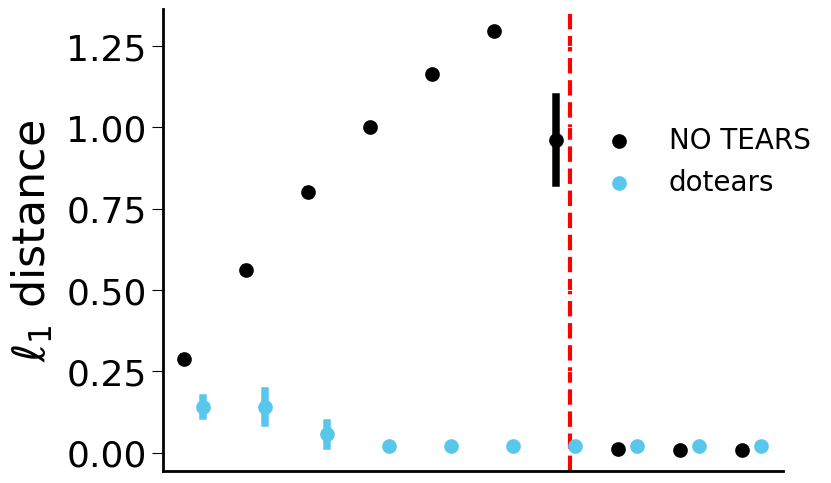

In [18]:
betas_to_keep = np.arange(0.1, 1.05, 0.1)
# betas_to_keep = np.append(betas_to_keep, 0.7)

betas_to_keep = np.round(betas_to_keep, 2).astype(np.float64)
for dag in dags:
    if dag != 'chain_2':
        continue
        
    sigma = 2.0
    plt.figure(figsize=(8, 6))

    plot_df = df[(df['dag'] == dag) & 
                 (df['method'].isin(['notears', 'dotears', 'golem-nv', 'dotears_no_omega'])) & 
                 (df['sigma_1'] == sigma) & 
                 df['beta'].isin(betas_to_keep)].copy()

    plot_df['beta'] = np.round(plot_df['beta'].astype(float).values, 2)
    plot_df['L1 dist'] = np.round(plot_df['L1 dist'].astype(float).values, 2).astype(float)
#             plt.tight_layout()

    ax = plt.gca()            
    if sigma == 1:
#                 ax.axvline(10 * np.sqrt(1 - 1 / sigma), 0, 1, color='red', linestyle='--')
#                 ax.axvline(9, 0, 1, color='blue')
        pass
    else:
        ax.axvline(10 * np.sqrt(1 - 1 / sigma) - 1, 0, 1,
                   color='red',
                   linestyle='--',
#                        alpha=0.7,
                   zorder=0)
#                 ax.axvline(9, 0, 1, color='blue')

    g = sns.pointplot(data=plot_df,
                      x='beta',
                      y='L1 dist',
                      hue='method',
                      palette=['black', '#59C7EB', ],
                      hue_order=['notears', 'dotears', ],
                      join=False,
                      errorbar=('se', 1),
                      scale=0.6,
                      dodge=0.3
#                           alpha=0.5
                     )

    if sigma == 100:
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             plt.yticks([0, 2, 4])
        pass
#         if sigma == 1:
#             plt.yticks([0, 0.05, 0.10])
#         if sigma == 2:
#             plt.yticks([0.0, 0.5, 1.0])
    ax.get_legend().remove()
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)
    plt.xticks(rotation=45)
    plt.ylabel(r'$\ell_1$' + ' distance')
#     plt.xlabel('w', fontsize=36)
#     plt.title(r'$\gamma$ = {}'.format(int(sigma)), fontsize=36)
#         plt.ylim(-0.05, 6)
#         sns.add_legend()
#         plt.setp(ax.collections, alpha=.5)
#             plt.savefig('../../dotears/figures/notears_p2/sigma{}.png'.format(sigma),
#                         dpi=72,
#                         bbox_inches='tight',)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    g.legend()

#         plt.ylim(0, 0.2)

    sns.move_legend(ax, "upper left",
                    bbox_to_anchor=(0.65, .8),
                    frameon=False,
                    title=None,
                    fontsize=20
                   )
    for t, l in zip(g.get_legend().texts, ['NO TEARS', 
                                       'dotears']):
        t.set_text(l)

    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False
    ) # labels along the bottom edge are off
    plt.xlabel(None)
    
    plt.savefig('../../dotears/RECOMB/p2.png',
            dpi=1000,
            bbox_inches='tight', )

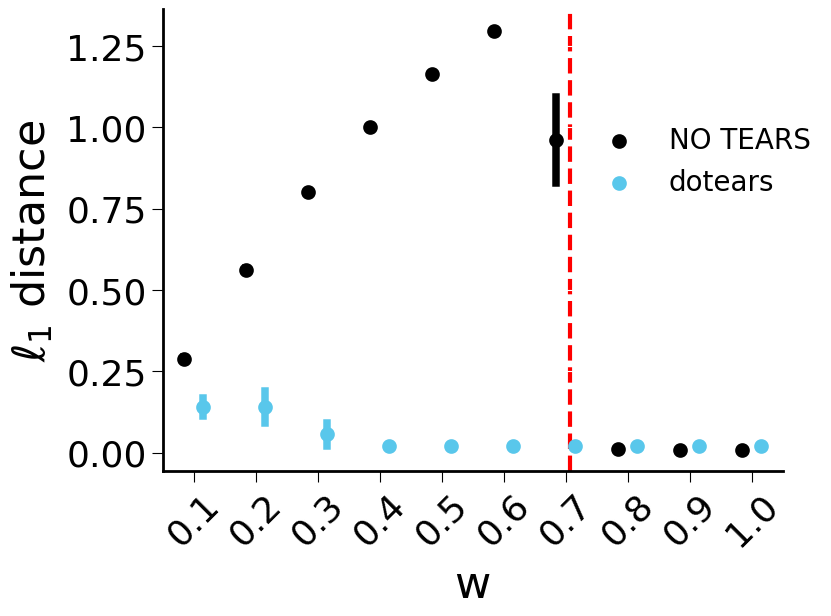

In [19]:
betas_to_keep = np.arange(0.1, 1.05, 0.1)
# betas_to_keep = np.append(betas_to_keep, 0.7)

betas_to_keep = np.round(betas_to_keep, 2).astype(np.float64)
for dag in dags:
    if dag != 'chain_2':
        continue
        
    sigma = 2.0
    plt.figure(figsize=(8, 6))

    plot_df = df[(df['dag'] == dag) & 
                 (df['method'].isin(['notears', 'dotears', 'golem-nv', 'dotears_no_omega'])) & 
                 (df['sigma_1'] == sigma) & 
                 df['beta'].isin(betas_to_keep)].copy()

    plot_df['beta'] = np.round(plot_df['beta'].astype(float).values, 2)
    plot_df['L1 dist'] = np.round(plot_df['L1 dist'].astype(float).values, 2).astype(float)
#             plt.tight_layout()

    ax = plt.gca()            
    if sigma == 1:
#                 ax.axvline(10 * np.sqrt(1 - 1 / sigma), 0, 1, color='red', linestyle='--')
#                 ax.axvline(9, 0, 1, color='blue')
        pass
    else:
        ax.axvline(10 * np.sqrt(1 - 1 / sigma) - 1, 0, 1,
                   color='red',
                   linestyle='--',
#                        alpha=0.7,
                   zorder=0)
#                 ax.axvline(9, 0, 1, color='blue')

    g = sns.pointplot(data=plot_df,
                      x='beta',
                      y='L1 dist',
                      hue='method',
                      palette=['black', '#59C7EB', ],
                      hue_order=['notears', 'dotears', ],
                      join=False,
                      errorbar=('se', 1),
                      scale=0.6,
                      dodge=0.3
#                           alpha=0.5
                     )

    if sigma == 100:
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             plt.yticks([0, 2, 4])
        pass
#         if sigma == 1:
#             plt.yticks([0, 0.05, 0.10])
#         if sigma == 2:
#             plt.yticks([0.0, 0.5, 1.0])
    ax.get_legend().remove()
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)
    plt.xticks(rotation=45)
    plt.ylabel(r'$\ell_1$' + ' distance')
#     plt.xlabel('w', fontsize=36)
#     plt.title(r'$\gamma$ = {}'.format(int(sigma)), fontsize=36)
#         plt.ylim(-0.05, 6)
#         sns.add_legend()
#         plt.setp(ax.collections, alpha=.5)
#             plt.savefig('../../dotears/figures/notears_p2/sigma{}.png'.format(sigma),
#                         dpi=72,
#                         bbox_inches='tight',)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    g.legend()

#         plt.ylim(0, 0.2)

    sns.move_legend(ax, "upper left",
                    bbox_to_anchor=(0.65, .8),
                    frameon=False,
                    title=None,
                    fontsize=20
                   )
    for t, l in zip(g.get_legend().texts, ['NO TEARS', 
                                       'dotears']):
        t.set_text(l)

#     plt.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False
#     ) # labels along the bottom edge are off
    plt.xlabel('w')
    
    plt.savefig('../../dotears/RECOMB/p2_alt.png',
            dpi=1000,
            bbox_inches='tight', )

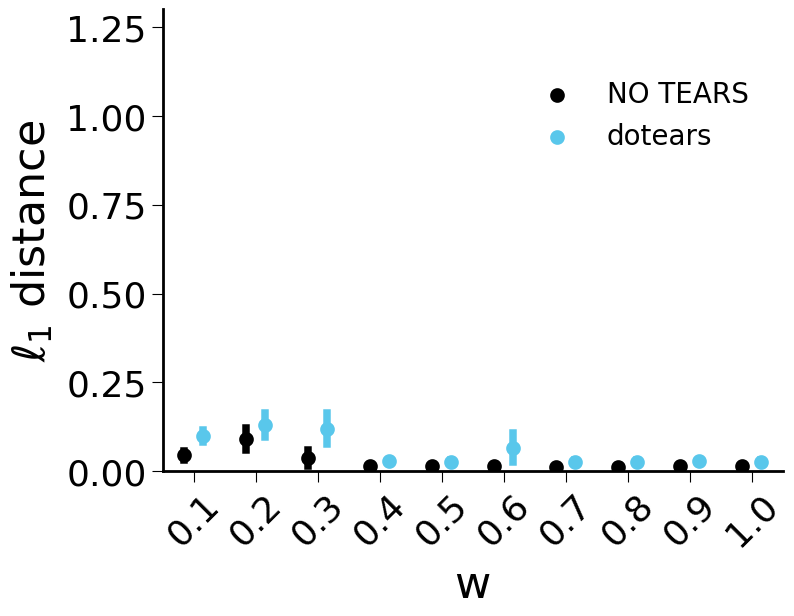

In [26]:
betas_to_keep = np.arange(0.1, 1.05, 0.1)
# betas_to_keep = np.append(betas_to_keep, 0.7)

betas_to_keep = np.round(betas_to_keep, 2).astype(np.float64)
for dag in dags:
    if dag != 'chain_2':
        continue
        
    sigma = 1.0
    plt.figure(figsize=(8, 6))

    plot_df = df[(df['dag'] == dag) & 
                 (df['method'].isin(['notears', 'dotears', 'golem-nv', 'dotears_no_omega'])) & 
                 (df['sigma_1'] == sigma) & 
                 df['beta'].isin(betas_to_keep)].copy()

    plot_df['beta'] = np.round(plot_df['beta'].astype(float).values, 2)
    plot_df['L1 dist'] = np.round(plot_df['L1 dist'].astype(float).values, 2).astype(float)
#             plt.tight_layout()

    ax = plt.gca()            
    if sigma == 1:
#                 ax.axvline(10 * np.sqrt(1 - 1 / sigma), 0, 1, color='red', linestyle='--')
#                 ax.axvline(9, 0, 1, color='blue')
        pass
    else:
        ax.axvline(10 * np.sqrt(1 - 1 / sigma) - 1, 0, 1,
                   color='red',
                   linestyle='--',
#                        alpha=0.7,
                   zorder=0)
#                 ax.axvline(9, 0, 1, color='blue')

    g = sns.pointplot(data=plot_df,
                      x='beta',
                      y='L1 dist',
                      hue='method',
                      palette=['black', '#59C7EB', ],
                      hue_order=['notears', 'dotears', ],
                      join=False,
                      errorbar=('se', 1),
                      scale=0.6,
                      dodge=0.3
#                           alpha=0.5
                     )

    if sigma == 100:
#             ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#             plt.yticks([0, 2, 4])
        pass
#         if sigma == 1:
#             plt.yticks([0, 0.05, 0.10])
#         if sigma == 2:
#             plt.yticks([0.0, 0.5, 1.0])
    ax.get_legend().remove()
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)
    plt.xticks(rotation=45)
    plt.ylabel(r'$\ell_1$' + ' distance')
#     plt.xlabel('w', fontsize=36)
#     plt.title(r'$\gamma$ = {}'.format(int(sigma)), fontsize=36)
#         plt.ylim(-0.05, 6)
#         sns.add_legend()
#         plt.setp(ax.collections, alpha=.5)
#             plt.savefig('../../dotears/figures/notears_p2/sigma{}.png'.format(sigma),
#                         dpi=72,
#                         bbox_inches='tight',)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    g.legend()

#         plt.ylim(0, 0.2)

    sns.move_legend(ax, "upper left",
                    bbox_to_anchor=(0.55, .9),
                    frameon=False,
                    title=None,
                    fontsize=20
                   )
    for t, l in zip(g.get_legend().texts, ['NO TEARS', 
                                       'dotears']):
        t.set_text(l)

#     plt.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False
#     ) # labels along the bottom edge are off
    plt.xlabel('w')
    plt.ylim(0, 1.3)
    plt.savefig('../../dotears/RECOMB/equal_variances.png',
            dpi=1000,
            bbox_inches='tight', )